In [2]:
import pandas as pd
df = pd.read_csv('d:/데이터/bank_churners.csv')

input_feature = df[['Customer_Age', 'Gender',
  'Dependent_count', 'Income_Category', 'Card_Category',
  'Months_on_book', 'Total_Relationship_Count',
  'Contacts_Count_12_mon', 'Credit_Limit', 
  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
  'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']]

target = df['Attrition_Flag']

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    input_feature, target, test_size=0.2,
    random_state=123)

print("훈련용(x) {}건".format(len(x_train)))
print("평가용(x) {}건".format(len(x_test)))
print("훈련용(y) {}건".format(len(y_train)))
print("평가용(y) {}건".format(len(y_test)))

훈련용(x) 8101건
평가용(x) 2026건
훈련용(y) 8101건
평가용(y) 2026건


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_class = DecisionTreeClassifier(max_depth=3,
                                             random_state=123)
dt_class.fit(x_train,y_train)

y_pred = dt_class.predict(x_test)

In [6]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy =  metrics.accuracy_score(y_test, y_pred)
print(confusion_matrix)  # 오분류표 작성
print(accuracy)             # 정확도 확인
print(metrics.classification_report(y_test, y_pred))
                                   # 분류평가표 확인

[[1616   99]
 [ 116  195]]
0.8938795656465943
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1715
           1       0.66      0.63      0.64       311

    accuracy                           0.89      2026
   macro avg       0.80      0.78      0.79      2026
weighted avg       0.89      0.89      0.89      2026



In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/GraphViz/bin'
!pip install graphviz

In [8]:
target_names = ['keep', 'attrit']
class_names=input_feature.columns.to_list()

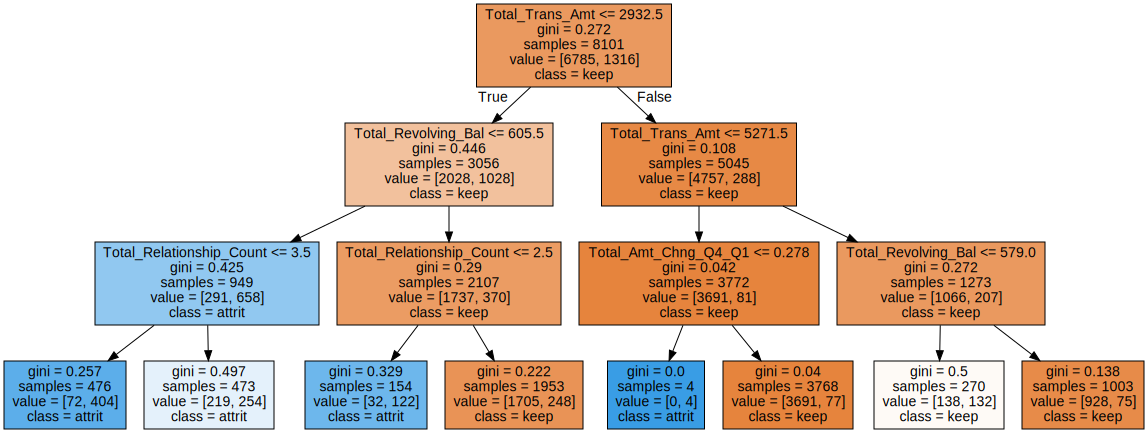

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(dt_class, out_file="tree.dot",
       class_names=target_names,
       feature_names=class_names, impurity = True, filled = True)
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
graph = graphviz.Source(dot_graph)
graph.render(filename='test_img', directory='./', format='jpg')

'test_img.jpg'